<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

#  Data Science and AI
## Lab 7.2: Decision Trees & Random Forests

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.7419
    - **ROC AUC**  = 0.6150
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first stp is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [ ]:
# Find the dataset described above 
# Hint: search for it through the UCI Machine Learning Repository

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read data in pandas
data = pd.read_csv("transfusion.data")

# Check data has loaded correctly
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [4]:
# Perform EDA by investigating each of the points above 
data = data.rename(columns={"Recency (months)": "Recency",
                           "Frequency (times)": "Frequency",
                           "Monetary (c.c. blood)": "Monetary",
                           "Time (months)": "Time",
                           "whether he/she donated blood in March 2007": "donated?"})
data.head()

,Recency,Frequency,Monetary,Time,donated?
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [5]:
#Number of features

data.shape
#5 features

(748, 5)

In [6]:
#Data types

data.dtypes
#all integers

Recency      int64
Frequency    int64
Monetary     int64
Time         int64
donated?     int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   donated?   748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [8]:
print("MAX :", "\n", data.max(), "\n")

print("MIN :", "\n", data.min())

MAX : 
 Recency         74
Frequency       50
Monetary     12500
Time            98
donated?         1
dtype: int64 

MIN : 
 Recency        0
Frequency      1
Monetary     250
Time           2
donated?       0
dtype: int64


In [9]:
data.isnull().sum()

Recency      0
Frequency    0
Monetary     0
Time         0
donated?     0
dtype: int64

In [10]:
#check for outliers
data_outliers = data.reset_index()
data_outliers.head()

,index,Recency,Frequency,Monetary,Time,donated?
0,0,2,50,12500,98,1
1,1,0,13,3250,28,1
2,2,1,16,4000,35,1
3,3,2,20,5000,45,1
4,4,1,24,6000,77,0


<AxesSubplot:xlabel='index', ylabel='Recency'>

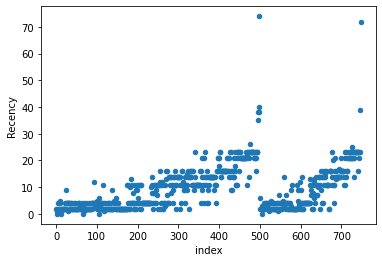

In [11]:
data_outliers.plot.scatter(x='index', y='Recency')

<AxesSubplot:xlabel='index', ylabel='Frequency'>

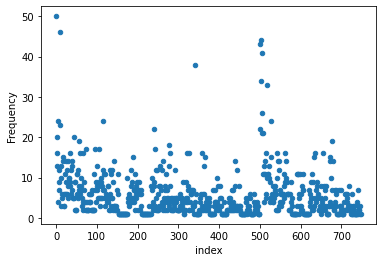

In [12]:
data_outliers.plot.scatter(x='index', y='Frequency')

<AxesSubplot:xlabel='index', ylabel='Monetary'>

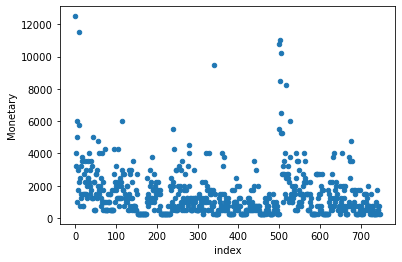

In [13]:
data_outliers.plot.scatter(x='index', y='Monetary')

<AxesSubplot:xlabel='index', ylabel='Time'>

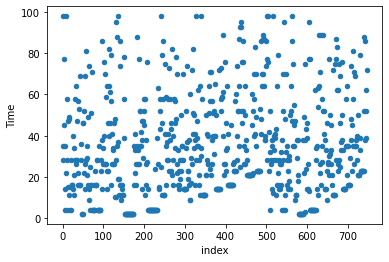

In [14]:
data_outliers.plot.scatter(x='index', y='Time')

<AxesSubplot:xlabel='index', ylabel='donated?'>

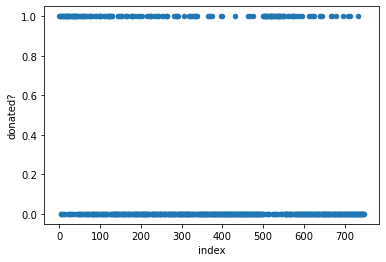

In [15]:
data_outliers.plot.scatter(x='index', y='donated?')

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [ ]:
# Filter/subset/clean the data according to your EDA findings

#outliers: yes there are but not necessary to remove?
#null/missing: none
#coded: none
#normalisation: will perform

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Recency	Frequency	Monetary	Time	donated?
X = data[['Recency', 'Frequency', 'Monetary', 'Time']]
X

,Recency,Frequency,Monetary,Time
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77
...,...,...,...,...
743,23,2,500,38
744,21,2,500,52
745,23,3,750,62
746,39,1,250,39


In [17]:
X[["Recency", 'Frequency', 'Monetary', 'Time']] = scaler.fit_transform(X[["Recency", 'Frequency', 'Monetary', 'Time']])
X.head()

<ipython-input-17-9d3634f32dc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[["Recency", 'Frequency', 'Monetary', 'Time']] = scaler.fit_transform(X[["Recency", 'Frequency', 'Monetary', 'Time']])
C:\Users\Megan Yit\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Recency,Frequency,Monetary,Time
0,-0.927899,7.623346,7.623346,2.615633
1,-1.175118,1.282738,1.282738,-0.257881
2,-1.051508,1.796842,1.796842,0.029471
3,-0.927899,2.482313,2.482313,0.439973
4,-1.051508,3.167784,3.167784,1.753579


In [18]:
y = data['donated?']

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [19]:
#input
X

#output
y
#1 = donated blood in Mar'07
#0 = didn't donate blood in Mar'07

0      1
1      1
2      1
3      1
4      0
      ..
743    0
744    0
745    0
746    0
747    0
Name: donated?, Length: 748, dtype: int64

In [ ]:
#unsupervised - Decision Trees & RandomForest

In [ ]:
#classification: binary

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [28]:
# Split your data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [30]:
# Choose a model or models

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(model.get_params())

#use DecisionTreeClassifier for DT

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


# Step 9: Fit the Model

In [31]:
# Fit model
model.fit(X_train, y_train)

RandomForestClassifier()

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [32]:
# Evaluate model against training set
model.score(X_train, y_train) #accuracy

0.9600798403193613

In [41]:
#tune hyperparameters
#############

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 200, num = 4)]

# Number of features to consider at every split
# max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 4)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
############

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 40, 70, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [1, 67, 133, 200]}


In [42]:
from sklearn.model_selection import GridSearchCV

finder = GridSearchCV(estimator=model,
                     param_grid=random_grid,
                     scoring='accuracy', #use accuracy for scoring for LOGREG (r2 for linreg)
                     n_jobs=None,
                     return_train_score=True)

finder.fit(X_train, y_train)
print(finder.best_params_)

#'bootstrap': True
#'max_depth': 70
#'max_features': 'sqrt'
#'min_samples_leaf': 4
#'min_samples_split': 2,
#'n_estimators': 133

{'bootstrap': True, 'max_depth': 70, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 133}


# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [43]:
#refit model

model = RandomForestClassifier(bootstrap = True,
                               max_depth = 70,
                               max_features = 'sqrt',
                               min_samples_leaf = 4,
                               min_samples_split = 2,
                              n_estimators = 133)
model.fit(X_train, y_train)

# Evaluate model against test set
preds = model.predict(X_test)
model.score(X_test, y_test) #mean accuracy

0.757085020242915

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

In [ ]:
#does it make sense to do a traintestsplit since:
#each tree in the random forest will do its own random train/test split of the data (bootstrap aggregation)

>

>

>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



